In [49]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [50]:
import keras
from keras.models import Sequential

In [51]:
model=Sequential()
model_part1=tf.keras.applications.ResNet50(
    include_top=False, 
    weights="imagenet",
    input_tensor=None,
    input_shape=(32,32,3), 
    pooling='avg', 
    classes=10,
  
)
#I will be adding a resize layer in the model itself.
resize = tf.keras.layers.Resizing(
    height=32,
    width=32,
    interpolation='bilinear',
    crop_to_aspect_ratio=False,
)
for layer in model_part1.layers:
    layer.trainable=False

In [52]:
from keras.layers import Flatten,Dense

In [53]:
dict = {0: 'T-shirt',1: 'Trouser',2: 'Pullover',3: 'Dress',4: 'Coat',5: 'Sandal',6: 'Shirt',7: 'Sneaker',8: 'Bag',9: 'Ankle boot'}

In [54]:
model.add(resize)
model.add(model_part1)

In [55]:
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [56]:
model.build(input_shape = (None,32,32,3))

In [57]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate= 1e-3),
     loss='sparse_categorical_crossentropy',
     metrics=['accuracy'])

In [58]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing_1 (Resizing)       (None, 32, 32, 3)         0         
                                                                 
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_2 (Dense)             (None, 512)               1049088   
                                                                 
 dense_3 (Dense)             (None, 10)                5130      
                                                                 
Total params: 24,641,930
Trainable params: 1,054,218
Non-trainable params: 23,587,712
_________________________________________________________________


In [59]:
fashion_mnist=keras.datasets.fashion_mnist

In [60]:
(X_train,Y_train),(X_test,Y_test)=fashion_mnist.load_data()

In [61]:
print(X_train.shape)

(60000, 28, 28)


In [62]:
X_train[0].shape

(28, 28)

In [63]:
#it is grey scale
#it has fix size of 28,28

In [64]:
import cv2
import numpy as np

In [65]:
X = np.zeros((X_train.shape[0],28,28,3),dtype=int)

In [66]:
for i in range(X_train.shape[0]):      
      img= cv2.cvtColor(X_train[i],cv2.COLOR_GRAY2RGB) #use loop for converting all images
      X[i] = img     

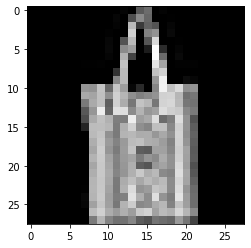

In [67]:
plt.imshow(X[57])

In [68]:
X.shape

(60000, 28, 28, 3)

In [69]:
dict[Y_train[57]]

'Bag'

In [70]:
X=X/255.0

In [71]:
model.fit(X, Y_train,epochs=10,validation_split=0.1)

Epoch 1/10
1688/1688 [==============================] - 38s 21ms/step - loss: 0.9138 - accuracy: 0.6581 - val_loss: 0.7035 - val_accuracy: 0.7380
Epoch 2/10
1688/1688 [==============================] - 31s 18ms/step - loss: 0.7197 - accuracy: 0.7273 - val_loss: 0.6629 - val_accuracy: 0.7492
Epoch 3/10
1688/1688 [==============================] - 28s 16ms/step - loss: 0.6807 - accuracy: 0.7420 - val_loss: 0.6658 - val_accuracy: 0.7492
Epoch 4/10
1688/1688 [==============================] - 26s 16ms/step - loss: 0.6548 - accuracy: 0.7521 - val_loss: 0.5938 - val_accuracy: 0.7777
Epoch 5/10
1688/1688 [==============================] - 27s 16ms/step - loss: 0.6450 - accuracy: 0.7554 - val_loss: 0.6172 - val_accuracy: 0.7707
Epoch 6/10
1688/1688 [==============================] - 27s 16ms/step - loss: 0.6217 - accuracy: 0.7658 - val_loss: 0.5699 - val_accuracy: 0.7935
Epoch 7/10
1688/1688 [==============================] - 26s 16ms/step - loss: 0.6097 - accuracy: 0.7692 - val_loss: 0.5918 -

**PREDICT**



In [72]:
X1 = np.zeros((X_test.shape[0],28,28,3),dtype=int)

In [73]:
for i in range(X_test.shape[0]):      
      img= cv2.cvtColor(X_test[i],cv2.COLOR_GRAY2RGB) #use loop for converting all images
      X1[i] = img     

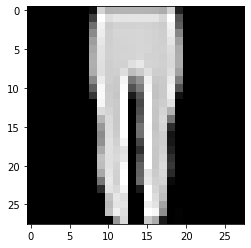

In [85]:
plt.imshow(X1[1635])

In [75]:
X1 = X1/255.0

In [76]:
y = model.predict(X1)


In [83]:
dict[np.argmax(y[1635])]

'Trouser'

In [84]:
dict[Y_test[1635]]

'Trouser'